<a href="https://colab.research.google.com/github/Adlucent/ga4-churn-prediction/blob/main/I_Setup_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Setup and EDA Part 1




In this notebook: <br>
1. Setup
2. Import Libraries
3. Load GA4 Data from BigQuery
4. Inspect the data
5. Perofrm a univariate analysis of each numeric, non-numeric and array columns
6. Save new dataframe as BigQuery table as a sample to refer to later

## Setup

1. **Connecting to BigQuery:** First, you'll need to create a GCP project and authenticate to connect to BigQuery. Reference [this notebook](https://colab.research.google.com/notebooks/bigquery.ipynb) for those setup steps. <br>
2. **Accessing BigQuery data:** There are several methods for accessing BigQuery data from within a .ipynb notebook. We'll be using %%bigquery line magic to access the data, and the bigquery.Client() method to save new tables back to BigQuery (both are covered in detail in the colab notebook linked above).

## Import Libraries

In [1]:
################################################################################
######################### CHANGE BQ PROJECT NAME BELOW #########################
################################################################################

project_name = 'adl-analytics' #add proj name
region = "US"  # GCP project region

In [2]:
# Google credentials 
from google.colab import auth, drive
auth.authenticate_user()

# BigQuery Magics 
'''BigQuery magics are used to run BigQuery SQL queries in a python environment.
These queries can also be run in the BigQuery UI '''

from google.cloud import bigquery
from google.cloud.bigquery import magics, Client, QueryJobConfig

magics.context.project = project_name #update project name 
client = bigquery.Client(project=magics.context.project)

# data processing libraries
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# dataframe display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

### Load GA4 Data from BigQuery <br>
We'll be using a publicly available sample table from GA4, containing event export data for three months from 2020-11-01 to 2021-01-31. <br>
Additional details on the sample data from Google can be found [here](https://developers.google.com/analytics/bigquery/web-ecommerce-demo-dataset).

If your dataset is too large to pull in everything, you can:
1. limit the EDA import to a select number of rows (see commented line at the end of the next code cell),
2. add more CPUs by upgrading Colab, or
3. use JupyterLabs within the Vertex AI Workbench. Read more about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing) and the [Pricing Calculator](https://cloud.google.com/products/calculator/).

In [3]:
%%bigquery data --project $project_name
SELECT *
FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_*`
WHERE RAND() < 0.2 -- since the dataset is large, this will import a random sample instead of the entire table

Query is running:   0%|          |

Downloading:   0%|          |

In [4]:
# create a copy of the imported data to avoid re-importing if we need to revert to original table
df = data.copy()

## Inspect the first 5 rows, shape, and datatypes

In [5]:
df.head()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,privacy_info,user_properties,user_first_touch_timestamp,user_ltv,device,geo,app_info,traffic_source,stream_id,platform,event_dimensions,ecommerce,items
0,20201129,1606668819291159,add_to_cart,"[{'key': 'ga_session_id', 'value': {'string_va...",<NA>,NaN,-8746515919,<NA>,None,67233620.1671202524,"{'analytics_storage': None, 'ads_storage': Non...",[],1606084688623959,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Europe', 'sub_continent': 'Sout...",None,"{'medium': '(data deleted)', 'name': '(data de...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...","[{'item_id': 'GGOEGXXX0919', 'item_name': 'You..."
1,20201129,1606677484124844,view_item,"[{'key': 'page_location', 'value': {'string_va...",<NA>,NaN,3885145797,<NA>,None,73251245.3210161348,"{'analytics_storage': None, 'ads_storage': Non...",[],1606677220614550,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Americas', 'sub_continent': 'No...",None,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...","[{'item_id': 'GGOEAFBA115499', 'item_name': 'A..."
2,20201129,1606609400334009,add_to_cart,"[{'key': 'all_data', 'value': {'string_value':...",<NA>,NaN,248761971,<NA>,None,77453683.2966684202,"{'analytics_storage': None, 'ads_storage': Non...",[],1606608141681482,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Oceania', 'sub_continent': 'Aus...",None,"{'medium': '(none)', 'name': '(direct)', 'sour...",2100450278,WEB,None,"{'total_item_quantity': 1, 'purchase_revenue_i...","[{'item_id': 'GGOEGHPB120910', 'item_name': 'G..."
3,20201129,1606678527538566,view_item,"[{'key': 'page_referrer', 'value': {'string_va...",<NA>,NaN,-7072026188,<NA>,None,77988473.9627260789,"{'analytics_storage': None, 'ads_storage': Non...",[],1606678516033847,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'S...","{'continent': 'Americas', 'sub_continent': 'No...",None,"{'medium': 'referral', 'name': '(referral)', '...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...","[{'item_id': 'GGOEGAEC134910', 'item_name': 'G..."
4,20201129,1606667084811268,view_item,"[{'key': 'engaged_session_event', 'value': {'s...",<NA>,NaN,-6663196721,<NA>,None,78675414.2746195696,"{'analytics_storage': None, 'ads_storage': Non...",[],1606667056322899,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'desktop', 'mobile_brand_name': '...","{'continent': 'Europe', 'sub_continent': 'Nort...",None,"{'medium': '<Other>', 'name': '<Other>', 'sour...",2100450278,WEB,None,"{'total_item_quantity': None, 'purchase_revenu...","[{'item_id': 'GGOEYAEA105610', 'item_name': 'Y..."


In [6]:
df.shape

(858378, 23)

* The table has 23 columns and 4,295,584 total rows.
* From the above sample, we can see that of those 23 columns, 8 have nested or multi-nested fields that will need to be unnested for further analysis and before model training.<br>

Next we'll perform an initial check of data types and null values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858378 entries, 0 to 858377
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   event_date                     858378 non-null  object 
 1   event_timestamp                858378 non-null  Int64  
 2   event_name                     858378 non-null  object 
 3   event_params                   858378 non-null  object 
 4   event_previous_timestamp       0 non-null       Int64  
 5   event_value_in_usd             1078 non-null    float64
 6   event_bundle_sequence_id       858378 non-null  Int64  
 7   event_server_timestamp_offset  0 non-null       Int64  
 8   user_id                        0 non-null       object 
 9   user_pseudo_id                 858378 non-null  object 
 10  privacy_info                   858378 non-null  object 
 11  user_properties                858378 non-null  object 
 12  user_first_touch_timestamp    

* The table contains a mix of object, int and float data types
* There are several numeric, non-numeric, and array/nested columns in the dataset

## Check for null values

In [8]:
# check for duplicates
df.isnull().sum()

event_date                            0
event_timestamp                       0
event_name                            0
event_params                          0
event_previous_timestamp         858378
event_value_in_usd               857300
event_bundle_sequence_id              0
event_server_timestamp_offset    858378
user_id                          858378
user_pseudo_id                        0
privacy_info                          0
user_properties                       0
user_first_touch_timestamp        17365
user_ltv                              0
device                                0
geo                                   0
app_info                         858378
traffic_source                        0
stream_id                             0
platform                              0
event_dimensions                 858378
ecommerce                             0
items                                 0
dtype: int64

**In the next notebook, we'll drop any columns that are completely empty. In this example, the following columns contain all null values, therefore we'll go ahead and drop them before proceeding:**
* `event_previous_timestamp`
* `event_server_timestamp_offset`
* `user_id`
* `app_info`
* `event_dimensions`

- *We'll leave `user_first_touch_timestamp` and `event_value_in_usd` in the table for now. They contain ~86k and ~4290342 missing values respectively, but we need to explore further to decide if we need those columns.*"

In [9]:
# inspect the remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858378 entries, 0 to 858377
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   event_date                     858378 non-null  object 
 1   event_timestamp                858378 non-null  Int64  
 2   event_name                     858378 non-null  object 
 3   event_params                   858378 non-null  object 
 4   event_previous_timestamp       0 non-null       Int64  
 5   event_value_in_usd             1078 non-null    float64
 6   event_bundle_sequence_id       858378 non-null  Int64  
 7   event_server_timestamp_offset  0 non-null       Int64  
 8   user_id                        0 non-null       object 
 9   user_pseudo_id                 858378 non-null  object 
 10  privacy_info                   858378 non-null  object 
 11  user_properties                858378 non-null  object 
 12  user_first_touch_timestamp    

## **Univariate Analysis**
We'll start by inspecting the columns by datatype, starting with numeric and then non-numeric columns. Columns containing arrays will be handled in the next notebook.

### **Numeric features**

In [10]:
# create a list of the numeric column headers
num_col = list(df.select_dtypes(include=np.number).columns)

In [11]:
# inspect the number of unique values in each numeric column
for col in num_col:
    print(col)
    print(df[col].nunique())
    print("*" * 20)

event_timestamp
791910
********************
event_previous_timestamp
0
********************
event_value_in_usd
204
********************
event_bundle_sequence_id
791823
********************
event_server_timestamp_offset
0
********************
user_first_touch_timestamp
200873
********************
stream_id
1
********************


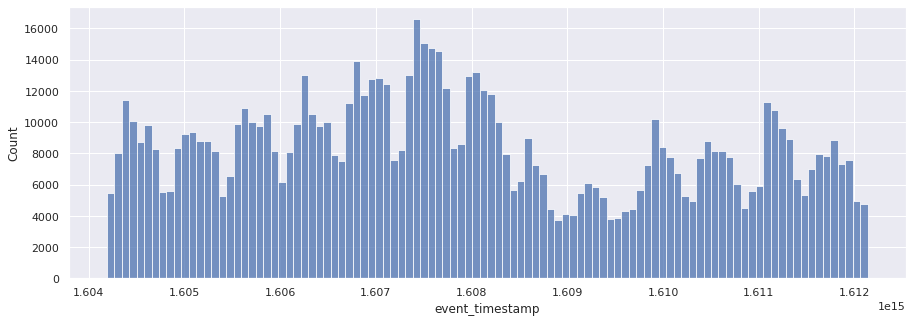

In [12]:
# plot distribution of event_timestamp
plt.figure(figsize=(15,5))
sns.histplot(data = df,x = "event_timestamp");

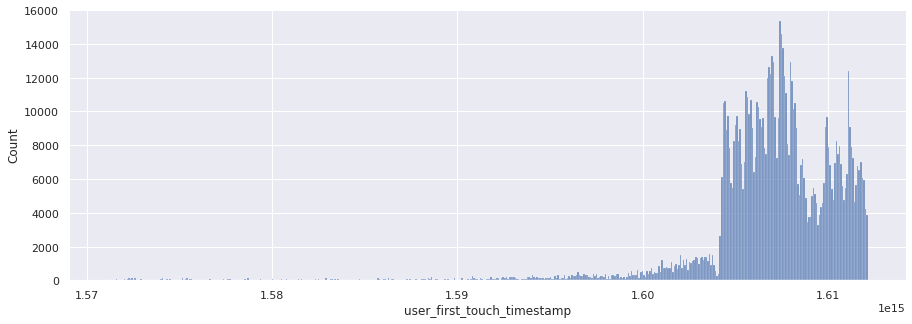

In [13]:
# plot distribution of user_first_touch_timestamp
plt.figure(figsize=(15,5))
sns.histplot(data = df,x = "user_first_touch_timestamp");

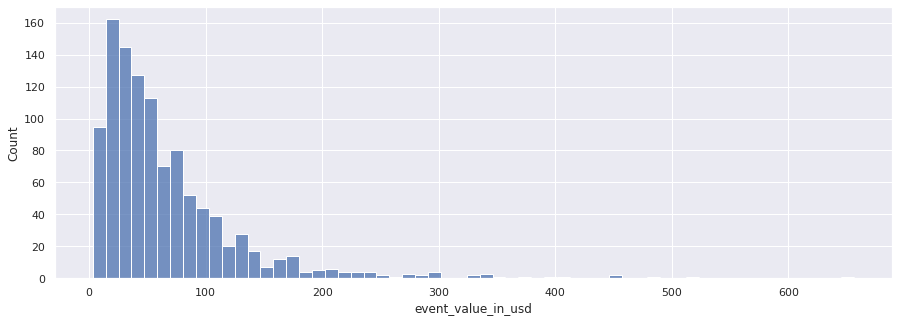

In [14]:
# plot distribution of event_value_in_usd
plt.figure(figsize=(15,5))
sns.histplot(data = df,x = "event_value_in_usd");

### **Numeric feature summary**
*Feature descriptions are taken from the GA4 BigQuery Export schema reference page: https://support.google.com/analytics/answer/7029846?hl=en*
* `event_timestamp`: 
    - The time (in microseconds, UTC) at which the event was logged on the client.
        - Leave this column as-is for now. We'll dig in later to understand its potential importance in the churn model.
        - We'll likely need to find a way to convert this to date/time.
* `event_bundle_sequence_id`: 
    - The sequential ID of the bundle in which these events were uploaded.
        - This column has high cardinality and will not be useful in our churn model. 
        - **Drop this column.**
* `event_value_in_usd`: 
    - The currency-converted value (in USD) of the event's "value" parameter.
        - This event is likely important for product or purchase related data. Even though there are a lot of missing values, we'll keep it for now. 
* `user_first_touch_timestamp`: 
    - The time (in microseconds) at which the user first opened the app or visited the site.
        - We'll dig in later to understand this feature's potential importance in the churn model.
        - We'll likely need to find a way to convert this to date/time.
        - For now in initial steps, we'll keep the null values as-is.
* `stream_id`:
    - The numeric ID of the stream.
        - Value is a constant.
        - **Drop this column.**

### **Non-numeric features**

In [15]:
# inspecting non-numeric columns that are not arrays; we'll handle arrays in the next notebook.
non_num_col = ("event_date","event_name","user_pseudo_id","platform")

In [16]:
# check for cardinality in non-numeric features
for col in non_num_col:
    print(col)
    print(df[col].nunique())
    print("*" * 20)

event_date
92
********************
event_name
17
********************
user_pseudo_id
204078
********************
platform
1
********************


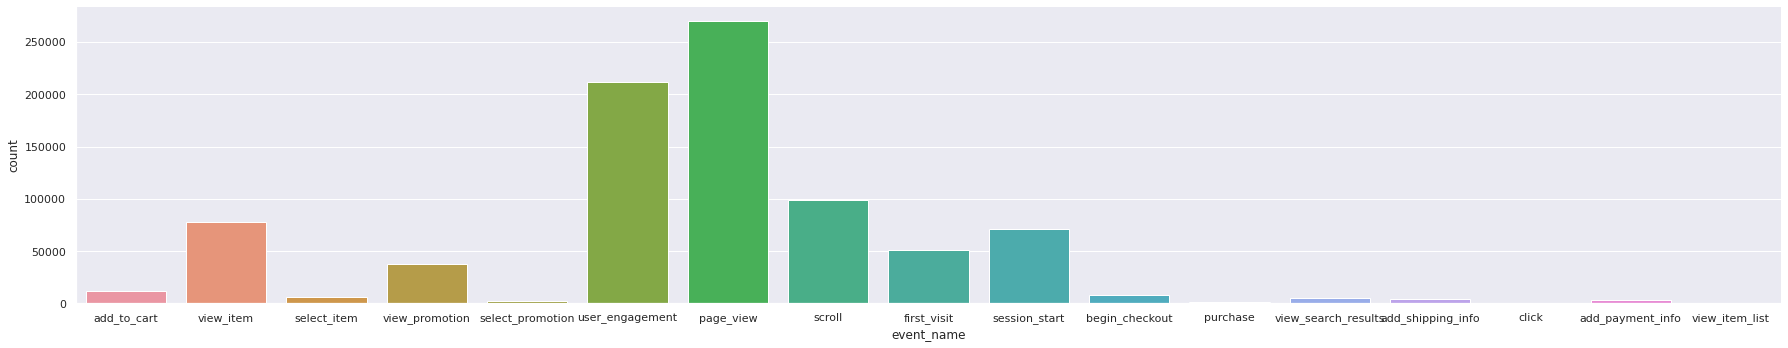

In [17]:
# inspect unique values in the event_name field
sns.catplot(
    data=df, 
    x="event_name", 
    kind="count", 
    height=5, 
    aspect=5
);

### **Non-numeric feature summary**

* `event_date`: 
    - The date on which the event was logged (YYYYMMDD format in the registered timezone of your app).
        - We'll need to convert to datetime in a future step.
* `event_name`:
    - The name of the event.
        - There are 17 unique values.
        - page_view and user_engagement are the most frequently occurring values.
        - purchase will be an important event we'll use for defining the churn target. It makes up a very small portion of this data since the timeframe is limited, but you'll likely have a larger number of these to work with.
* `user_pseudo_id`:
    - The pseudonymous id (e.g., app instance ID) for the user.
* `platform`:
    - The platform on which the app was built.
    - Constant value.
    - **Drop this column.**

### **Array Features**

*We'll handle the following array features in the next notebook.*
* `event_params`:
    - A repeated record of the parameters associated with this event.
* `privacy_info`:
    - Fields are based on the consent status of your users when you are using consent mode.
* `user_properties`:
    - A repeated record of user properties set with the setUserProperty API.
* `user_ltv`:
    - A record of Lifetime Value information about the user. This field is not populated in intraday tables.
* `device`:
    - A record of device information.
* `geo`:
    - A record of the user's geographic information.
* `traffic_source`:
    - Name of the traffic source that first acquired the user. This field is not populated in intraday tables.
* `ecommerce`:
    - A record of information about ecommerce.
* `items`:
    - A repeated record of items included in this event.

## Save latest table to BigQuery
Save this new table to our own BigQuery project to use as the starting data source in the next notebook.

In [ ]:
client = bigquery.Client(project = project_name)
table_id = 'public_sample_data.churn_ga4_1'

job_config = bigquery.LoadJobConfig(
    write_disposition=bigquery.job.WriteDisposition.WRITE_TRUNCATE
)

job = client.load_table_from_dataframe(
    df, table_id, job_config=job_config
)

# Wait for the load job to complete.
job.result()

/usr/local/lib/python3.7/dist-packages/google/cloud/bigquery/_pandas_helpers.py:554: UserWarning: Pyarrow could not determine the type of columns: event_params, user_id, privacy_info, user_properties, user_ltv, device, geo, app_info, traffic_source, event_dimensions, ecommerce, items.
  ", ".join(field.name for field in unknown_type_fields)


LoadJob<project=adl-analytics, location=US, id=f84e257a-0587-477a-a905-f7616f036bfd>